#### Logistic Regression

Logistic Regression is a statistical method used for binary classification problems, where the dependent variable is categorical and represents two classes (e.g., 0 or 1, True or False, Yes or No). Despite its name, logistic regression is used for classification, not regression.

<u>*Logistic Regression Model:*</u>
The logistic regression model is based on the logistic function (also called the sigmoid function), which maps any real-valued number to the range of [0,1]. The logistic function is defined as:

$Sigmoid(z) = \frac{1}{1 + \exp{(-z)}}$

The logistic function maps `z` to the probability that the dependent variable belongs to the positive class

$P(Y=1|X) = Sigmoid(z)$

#### Sigmoid Function

The sigmoid function, also known as the logistic function, is a mathematical function that maps any real-valued number to a value between 0 and 1. It is particularly used in logistic regression to model the probability of a binary outcome.

The sigmoid function has an S-shaped curve, and its output ranges from 0 to 1. It is characterized by the following properties:

1. Asymptotes: The sigmoid function approaches 0 as `z` approaches negative infinity and approaches 1 as `z` approaches positive infinity.
2. Midpoint: The sigmoid function has a midpoint at `z=0`, where `σ(0)=0.5`.
3. Derivative: The derivative of the sigmoid function with respect to `z` is given by `(z)=σ(z)⋅(1−σ(z))`. This property is crucial for gradient-based optimization algorithms used in training machine learning models like logistic regression.

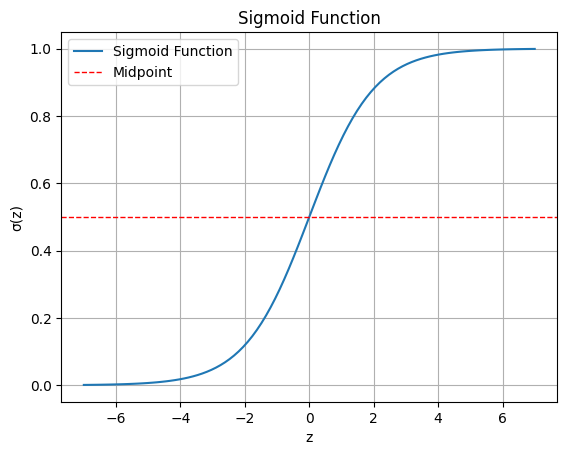

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values for z
z_values = np.linspace(-7, 7, 100)

# Compute sigmoid values
sigmoid_values = sigmoid(z_values)

# Plot the sigmoid function
plt.plot(z_values, sigmoid_values, label="Sigmoid Function")
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.axhline(0.5, color='red', linestyle='--', linewidth=1, label="Midpoint")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import numpy as np

class LogisticRegressionScratch:

    def __init__(self, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros((n,1))
        self.bias = 0

        for _ in range(self.n_iterations):
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)

            # Compute gradients
            dz = predictions - y
            dw = (1 / m) * np.dot(X.T, dz)
            db = (1 / m) * np.sum(dz)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

# Example usage:
# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = (4 + 3 * X + np.random.randn(100, 1) > 6).astype(int)

# Instantiate and train the logistic regression model
log_reg = LogisticRegressionScratch(learning_rate=0.1, n_iterations=1000)
log_reg.fit(X, y)

# Make predictions
predictions = log_reg.predict(X)

# Display accuracy
accuracy = np.mean(predictions == y)
print("Accuracy:", accuracy)

Accuracy: 0.86


In [2]:
""" 
Let's consider an example using the famous Iris dataset, 
where the task is to predict whether a flower is of the species "setosa" or not based on the petal width.
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, 3:] # Petal width feature
y = (iris.target == 0).astype(int) # 1 if Iris setosa, 0 otherwise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but can be beneficial for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
[[20  0]
 [ 0 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

